In [86]:
#two dimensions of word distribution/semantic space assembled from two dense scaled singular vectors


from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform
from pickleshare import PickleShareDB

db = PickleShareDB('~/.ipython/profile_default/db/autorestore')

dictionary = db['dictionary']

dictionary_lookup = db['dictionary_lookup']

word_vectors_2d = db['word_vectors_2d']

doc_lookup = db['doc_lookup']

docs = db['docs']

In [87]:
word_vectors_2d['term'] = word_vectors_2d.index.map(dictionary_lookup.get)
word_vectors_2d = word_vectors_2d.set_index('term')[['x','y']]

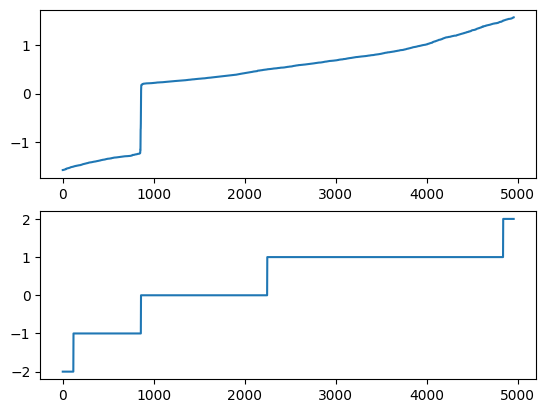

In [88]:


word_vectors_2d['magnitude'] = word_vectors_2d['x'].pow(2)+word_vectors_2d['y'].pow(2)

word_vectors_2d['angle'] = np.arctan(word_vectors_2d['y']/word_vectors_2d['x'])

angles = word_vectors_2d.angle.to_numpy()

angles = angles[angles.argsort()]

r_angles = word_vectors_2d.angle.round(0).to_numpy()

r_angles = r_angles[r_angles.argsort()]

fig = figure()
angle_values = fig.add_subplot(2,1,1)
angle_values.plot(angles)

angle_values = fig.add_subplot(2,1,2)
angle_values.plot(r_angles)

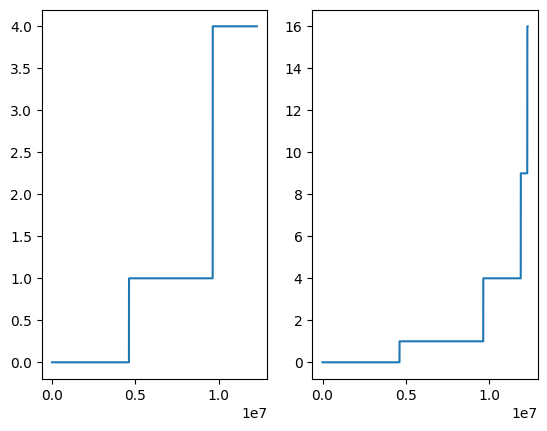

In [89]:
angles = word_vectors_2d.round(0).angle.to_numpy()

angles = angles[angles.argsort()]

angles_dif_matrix = np.reshape(angles, (len(angles), 1))
angles_dif_matrix = angles_dif_matrix - angles_dif_matrix.transpose()

preclip_angles_dif_matrix = np.square(angles_dif_matrix)

angles_dif_matrix = np.clip(preclip_angles_dif_matrix,0,4)

preclip_condensed_angles = squareform(preclip_angles_dif_matrix)

condensed_angles = squareform(angles_dif_matrix)

fig = figure()
condensed_angles_visualization = fig.add_subplot(1,2,1)

condensed_angles_visualization.plot(condensed_angles[np.argsort(condensed_angles)])

condensed_angles_visualization = fig.add_subplot(1,2,2)

condensed_angles_visualization.plot(preclip_condensed_angles[np.argsort(preclip_condensed_angles)])


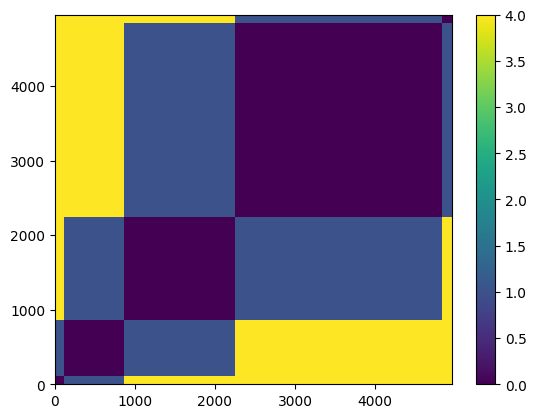

In [90]:

fig = figure()
angles_visualization = fig.add_subplot(1,1,1)
apc = angles_visualization.pcolormesh(angles_dif_matrix)
fig.colorbar(apc)

In [91]:

pd.set_option('max_colwidth', None)
word_vectors_2d.angle.round(0).sort_values().to_frame().reset_index(names=['latent_topics']).groupby('angle').agg(tuple).head(20)


,latent_topics
angle,
-2.0,"(avoidance, ballarats, randall, cruelty, kerr, infrastructure, sydney, cmc, weird, disorder, fighting, supporters, arrested, bus, unit, obsession, drive, isa, japan, appeals, bocka, teams, injuries, pakistan, supreme, harvey, bird, call, reformists, 150, home, lomax, seven, improvement, pre, rebirth, preparation, moves, muster, politicians, bayern, cfmeu, berri, polo, sexual, four, intruder, play, imposing, solved, wounded, jayasuriya, morris, minor, long, rail, helps, ceremony, celebrates, attacks, coles, restaurant, complete, society, completes, mystery, cannabis, serve, addresses, confirmation, coast, forced, conditions, wellington, public, devastated, fortescue, pony, moved, malibu, crashing, aircraft, pot, named, mdbp, guard, arrives, houthi, johnson, israel, phoneix, weeks, forum, upgrade, preference, vinnies, linked, websites, activate, nurses, ...)"
-1.0,"(passing, yachtsman, clock, holmes, extradited, elderly, 1989, gender, tailed, dictionary's, livex, fare, bank, unaware, turtles, bodies, trade, sun, historians, ovation, smaller, festival, acquitted, smokers, tame, sacred, explain, tornado, smuggling, oscar, relatives, damien, induced, spark, hearings, commissioner, combustion, droving, grandstand, teen, bring, marree, knife, confirmed, stabbed, determination, police, queenslands, action, face, gripped, dna, corby, facto, downgrades, wear, explosion, contents, brink, condemns, guns, chip, delay, hughes, totten, cal, using, doubtful, rust, australia', 166, injured, mcmillan, horror, beechboro, ultimatum, refused, fellow, pilgrimage, thailand, chokes, survivors, gaza, wwii, plantation, transplant, snap, dumbstruck, woe, junot, bitten, jeffrey, confirm, warnings, year, 'wont, cindy, documentary, siege, testify, ...)"
0.0,"(issues, shares, 0801, drags, analyst, mirena, rates, fashion, overcome, 10th, space, vegetables, position, residents, aac, launches, aru, pan, priority, sees, music, charmian, frowned, brandis, huge, loves, wait, upon, indonesia, jinping, havoc, strike, written, newton, approval, presentational, begin, firenado, state, cites, react, graincorp, artworks, clydesdale, seen, jurrah, 50m, avoid, february, celebrate, lib, winery, championships, vine, angelique, warming, 'better, endangered, inspire, project, close, swamp, retires, tasmania, supercomputer, got, would, sickened, cdu, clarence, faso, ryans, date, held, war, witness, barnaby, sanctions, kfc, mens, drop, video, calvary, program, biggs, dominate, liverpool, wasted, centres, transforming, draw, syd, landings, agricultural, differences, weapons, swim, damage, volunteer, clover, ...)"
1.0,"(albert, spill, petition, favouring, get, baggage, among, discusses, evolving, oxfam, 2021, surface, greensboro, sellingtochina, uni, winners, siphon, folau, gathering, drowned, battalion, care, caps, emulates, qantas, hockey, joko, programme, feral, logging, bullying, locust, manlys, show, invictus, mounts, ball, basin, braun, nanny, advance, shipment, underway, pick, apply, fruit, quarter, asset, inundated, things, feel, jeanne, keelty, artist, destroyed, split, hit, government, villagers, prays, eased, ridge, 702, terrorism, put, floods, trust, triangle, tomic, baby, gps, syria, whether, related, sao, broken, kieron, poverty, inland, ngv, quay, store, auctioned, lomu, anonymous, calling, criticised, bowls, ginger, patriotism, encouraging, test, hizb, interviewed, equals, german, rate, gst, heels, structure, ...)"
2.0,"(months, sundance, resident, error, nigerian, forestrysa, docs, pat, wages, snake, picked, improved, hiccups, sacked, woman, koala, benefit, dies, royal, lit;, vandal, sleeping, relieve, hamilton, offers, ballarat, egmond, firefighter, mackie, rentz, outrage, assault, albanese, plays, habitat, chambers, ajax, wrestlers, drunk, 'minf, playground, admits, cleaner, sumo, deferred, huntfst, tanks, rower, bag, extent, snatching, res, animal, alexander, eviction, simon, bridges, hezbollah, continues, boggling', jobless, son, 

In [92]:
query = 100

dictionary_lookup[query]

'rain'

In [96]:
distance = word_vectors_2d['x'].to_frame()

distance['y'] = word_vectors_2d['y']

distance['x_2'] = distance.x.loc[dictionary_lookup[query]]

distance['y_2'] = distance.y.loc[dictionary_lookup[query]]

distance['dist'] = ((distance.x_2-distance.x)**2 + (distance.y_2-distance.y)**2)**(1/2)

distance.sort_values('dist', ascending=True).head(20)

,x,y,x_2,y_2,dist
term,,,,,
rain,0.044962,0.023094,0.044962,0.023094,0.000000
testing,0.046598,0.021502,0.044962,0.023094,0.002282
staff,0.044454,0.029044,0.044962,0.023094,0.005972
ama,0.039445,0.018942,0.044962,0.023094,0.006905
urged,0.039316,0.027248,0.044962,0.023094,0.007010
fight,0.041861,0.030029,0.044962,0.023094,0.007598
cup,0.036697,0.020478,0.044962,0.023094,0.008669
budget,0.039965,0.030276,0.044962,0.023094,0.008750
doctor,0.035549,0.022754,0.044962,0.023094,0.009420


In [97]:
distance = word_vectors_2d['angle'].to_frame()

distance['angle_2'] = distance.angle.loc[dictionary_lookup[query]]

distance['dist'] = (distance.angle_2 - distance.angle).abs()

distance.sort_values('dist', ascending=True).head(20)

,angle,angle_2,dist
term,,,
rain,0.474484,0.474484,0.000000
aphasia,0.474389,0.474484,0.000095
overcome,0.474389,0.474484,0.000095
sufferers,0.474389,0.474484,0.000095
night,0.474800,0.474484,0.000315
partner,0.474115,0.474484,0.000369
abusing,0.474115,0.474484,0.000369
daughters,0.474115,0.474484,0.000369
woman's,0.474115,0.474484,0.000369


In [95]:
docs.iloc[doc_lookup.loc[doc_lookup.word == query].doc].headline_text

41                              goldfields rain predicted to increase
324                                       rain hit fairy cave reopens
787     thousands lose power in perth as rain sparks power pole fires
1413                             sa farmers hope for good spring rain
1494                             rain sparks western qld locust fears
1709      weather thunderstorms rain hail springfield qld damage bill
1942           severe storms dump heavy rain on south east queensland
Name: headline_text, dtype: object